In [13]:
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle
from scipy import optimize
import seaborn as sns
from matplotlib.colors import LogNorm
import itertools
palette=sns.color_palette()

fparams =  {'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'axes.labelsize': 26,
            'axes.titlesize': 22,
            'font.size': 22,
            'legend.fontsize': 20,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path',
            'lines.linewidth': 2.5,
             
            'lines.markersize': 10}

plt.rcParams.update(fparams)

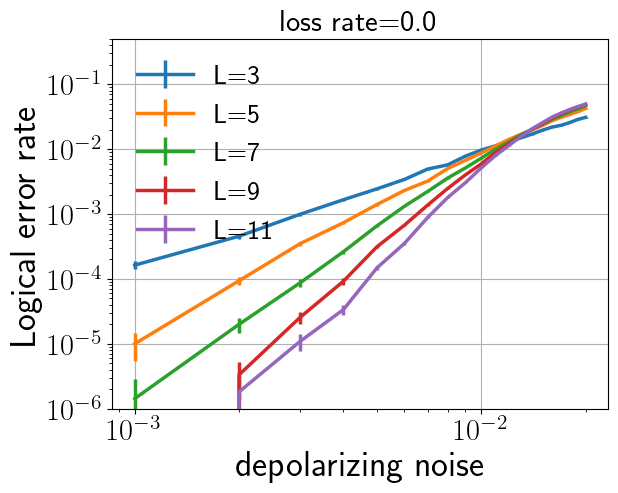

In [14]:
#Logical error rate at a fixed loss rate

Ls = range(3,13,2)#list of distances to plot
loss=0.0#loss probability

log_errors_all= []
depo_all=[]
num_shots_all=[]

#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    #compute the logical error per round and the associate derror bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate per round")
plt.title('loss rate={}'.format(loss))
plt.grid()
plt.yscale("log")
plt.xscale('log')
#plt.xlim(0.003,0.007)
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

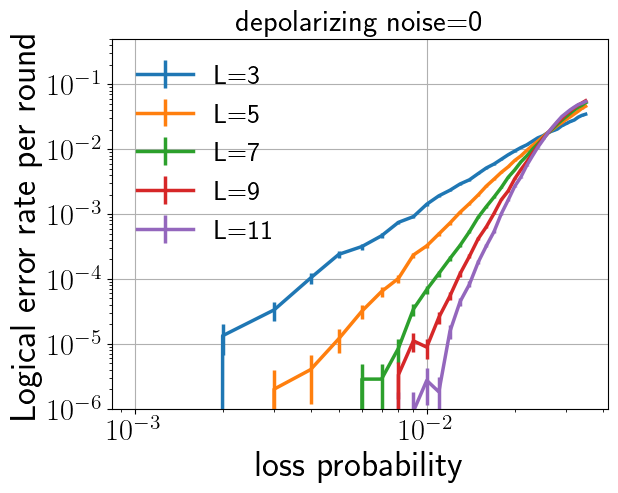

In [15]:
#Logical error rate at a fixed depolarizing noise probability


Ls = range(3,13,2)#list of distances to plot
depo=0 #depolarizing noise probability

log_errors_all= []
loss_rate_all=[]
num_shots_all=[]


#load the results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        

#plot the results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
plt.xlabel("loss probability")
plt.ylabel("Logical error rate per round")
plt.title('depolarizing noise={}'.format(depo))
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend(loc=0);

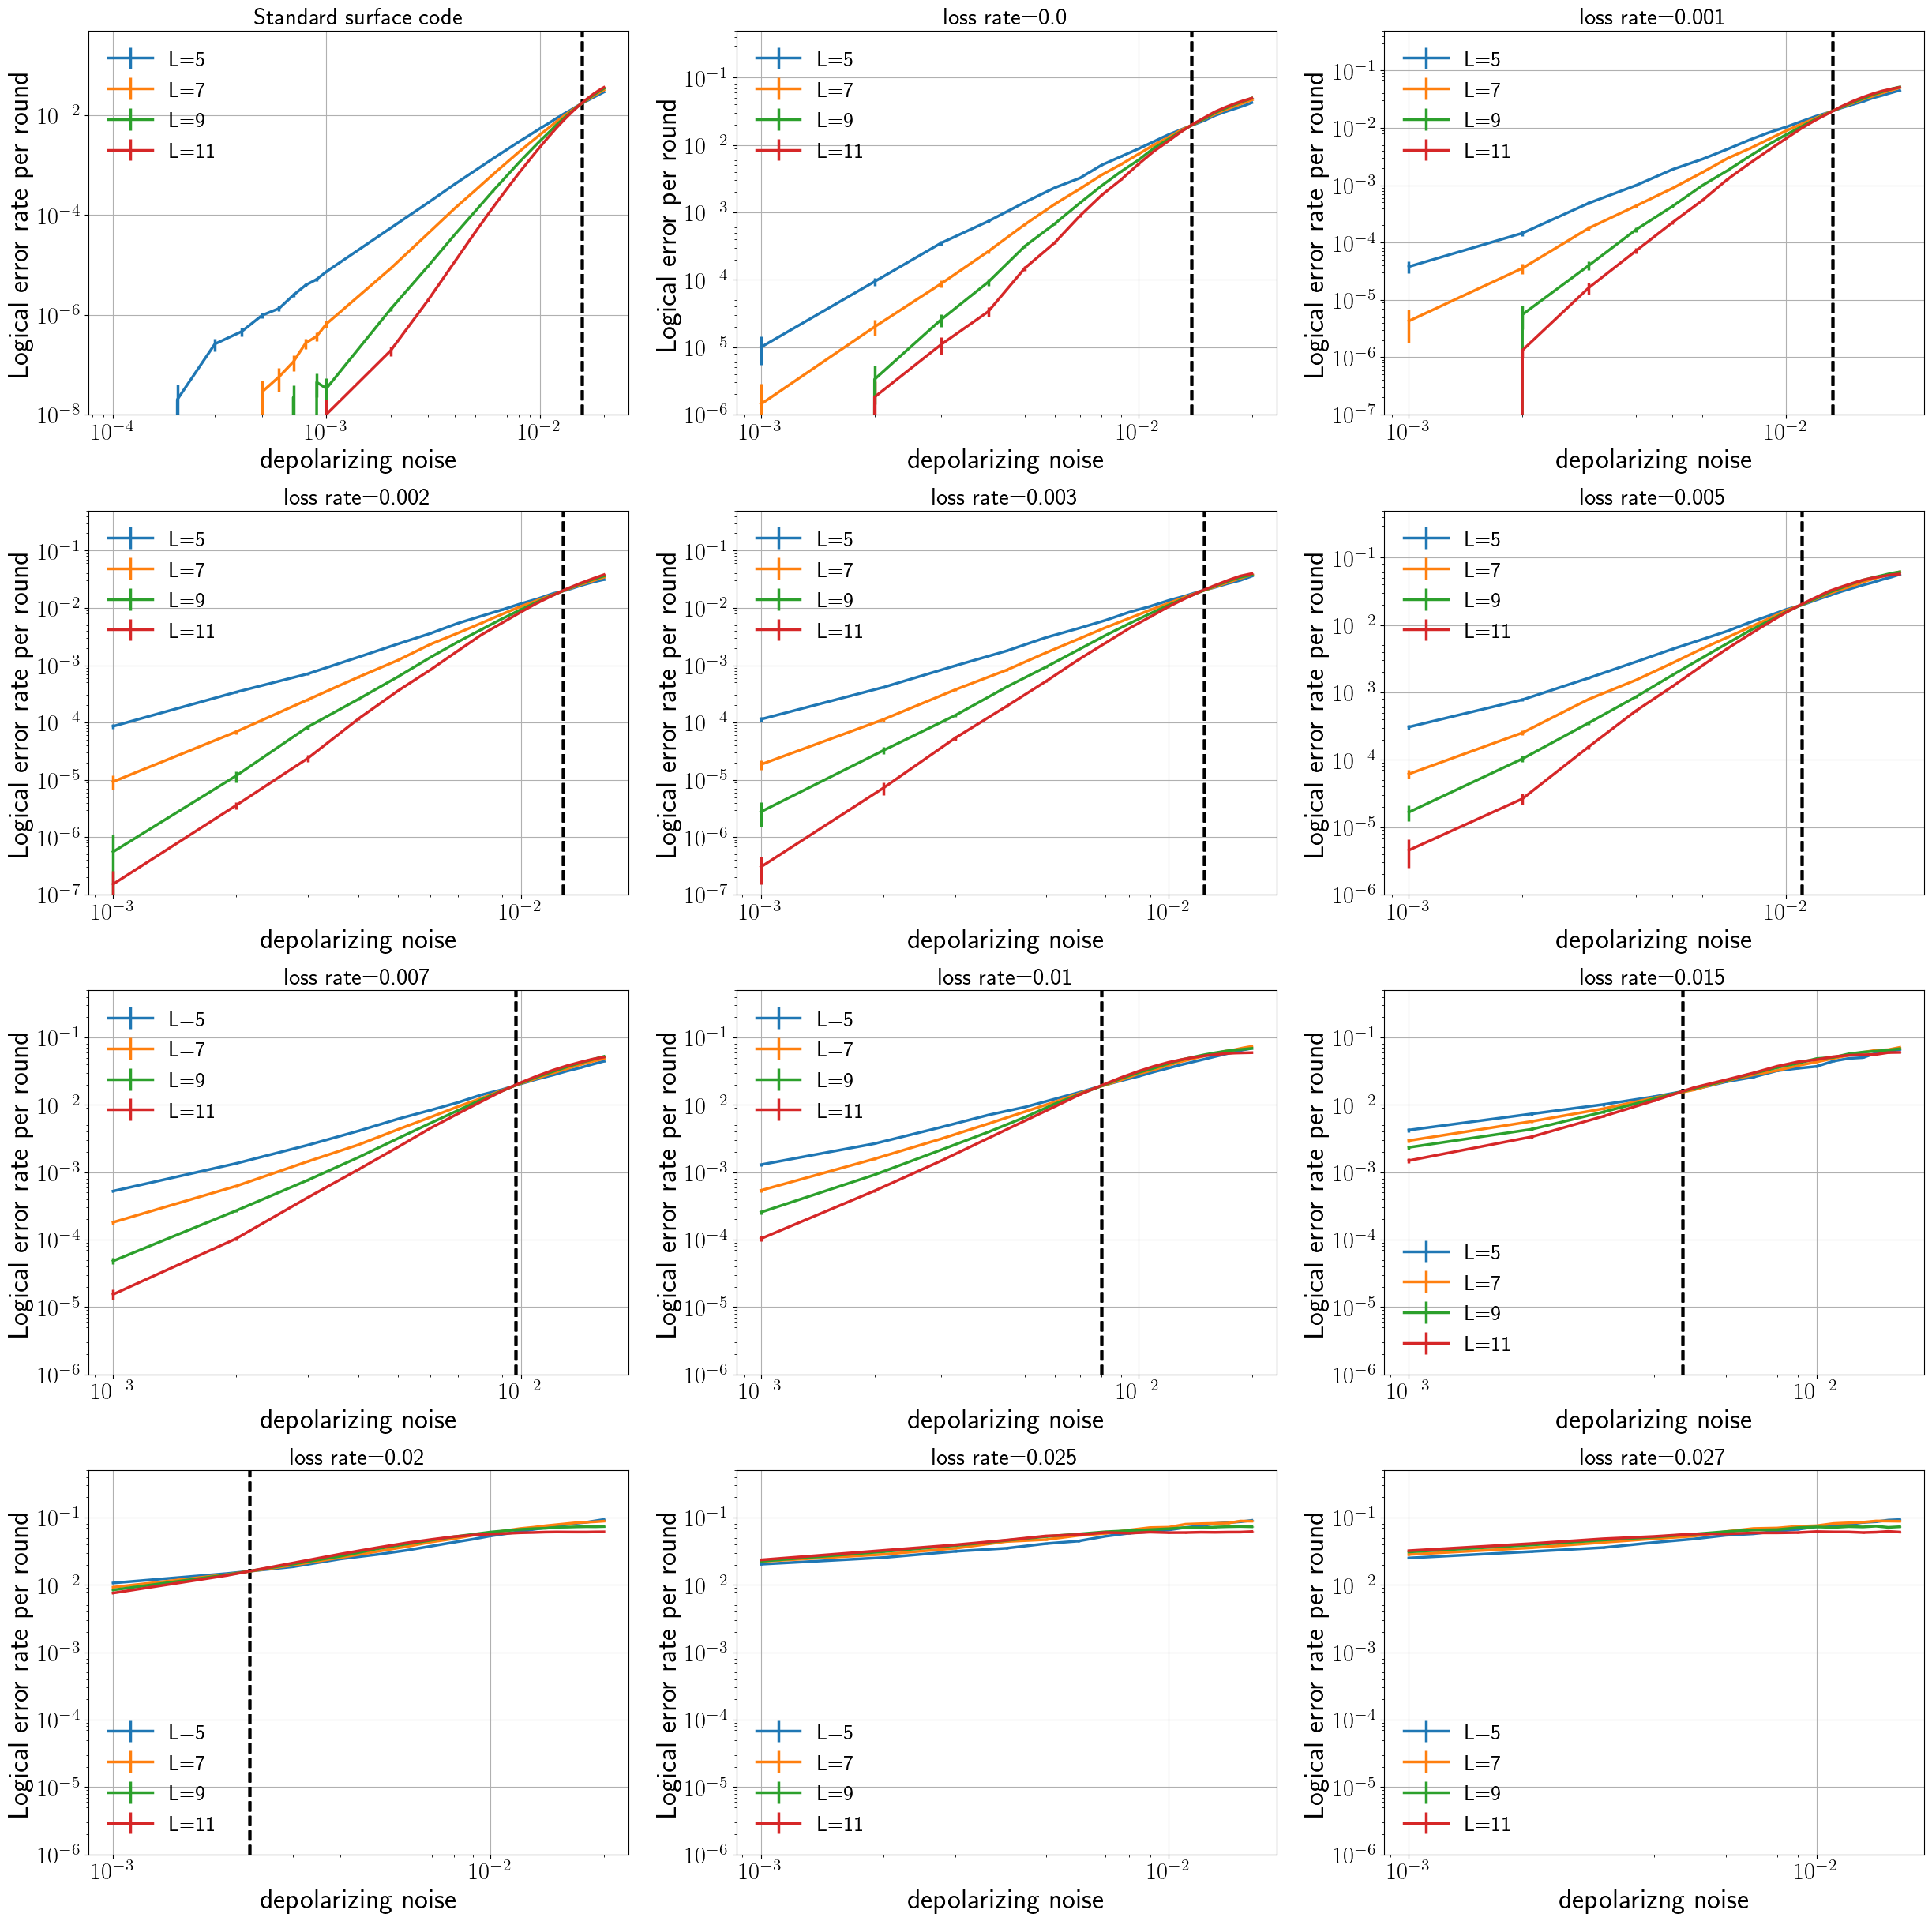

In [17]:
#logical error at various loss proabilities

from matplotlib.markers import MarkerStyle
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset




fig = plt.figure(figsize=(30, 30))
table = gridspec.GridSpec(ncols=3, nrows=4)


ax1 = fig.add_subplot(table[0, 0])

ax2 = fig.add_subplot(table[0, 1])

ax3 = fig.add_subplot(table[0, 2])

ax4 = fig.add_subplot(table[1, 0])

ax5 = fig.add_subplot(table[1, 1])

ax6 = fig.add_subplot(table[1, 2])

ax7 = fig.add_subplot(table[2, 0])

ax8 = fig.add_subplot(table[2, 1])

ax9 = fig.add_subplot(table[2, 2])

ax10 = fig.add_subplot(table[3, 0])

ax11 = fig.add_subplot(table[3, 1])

ax12 = fig.add_subplot(table[3, 2])


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]

for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_standard_surface_code_d={}.pkl'.format(L), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
   
    ax1.axvline(x=0.0158,linestyle='--',color='black')
    
    
    ax1.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
ax1.set_xlabel("depolarizing noise")
ax1.set_ylabel("Logical error rate per round")
ax1.set_title('Standard surface code')
ax1.grid()
ax1.set_yscale("log")
ax1.set_xscale('log')
ax1.set_ylim(10**(-8),0.5)
ax1.legend(loc=0);





Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.00
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    

for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax2.axvline(x=0.0138,linestyle='--',color='black')
   
    
    ax2.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))

ax2.set_xlabel("depolarizing noise")
ax2.set_ylabel("Logical error  per round")
ax2.set_title('loss rate={}'.format(loss))
ax2.grid()
ax2.set_yscale("log")
ax2.set_xscale('log')
ax2.set_ylim(10**(-6),0.5)
ax2.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.001
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    ax3.axvline(x=0.0133,linestyle='--',color='black')
    
    ax3.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax3.set_xlabel("depolarizing noise")
ax3.set_ylabel("Logical error rate per round")
ax3.set_title('loss rate={}'.format(loss))
ax3.grid()
ax3.set_yscale("log")
ax3.set_xscale('log')
ax3.set_ylim(10**(-7),0.5)
ax3.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.002
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax4.axvline(x=0.0127,linestyle='--',color='black')
   
    ax4.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax4.set_xlabel("depolarizing noise")
ax4.set_ylabel("Logical error rate per round")
ax4.set_title('loss rate={}'.format(loss))
ax4.grid()
ax4.set_yscale("log")
ax4.set_xscale('log')
ax4.set_ylim(10**(-7),0.5)
ax4.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.003
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax5.axvline(x=0.0122,linestyle='--',color='black')
   
    ax5.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax5.set_xlabel("depolarizing noise")
ax5.set_ylabel("Logical error rate per round")
ax5.set_title('loss rate={}'.format(loss))
ax5.grid()
ax5.set_yscale("log")
ax5.set_xscale('log')
ax5.set_ylim(10**(-7),0.5)
ax5.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.005
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax6.axvline(x=0.011,linestyle='--',color='black')
   
    ax6.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax6.set_xlabel("depolarizing noise")
ax6.set_ylabel("Logical error rate per round")
ax6.set_title('loss rate={}'.format(loss))
ax6.grid()
ax6.set_yscale("log")
ax6.set_xscale('log')
ax6.set_ylim(10**(-6),0.5)
ax6.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.007
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
   
    ax7.axvline(x=0.0097,linestyle='--',color='black')
   
    ax7.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax7.set_xlabel("depolarizing noise")
ax7.set_ylabel("Logical error rate per round")
ax7.set_title('loss rate={}'.format(loss))
ax7.grid()
ax7.set_yscale("log")
ax7.set_xscale('log')
ax7.set_ylim(10**(-6),0.5)
ax7.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.01
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax8.axvline(x=0.008,linestyle='--',color='black')
   
    ax8.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax8.set_xlabel("depolarizing noise")
ax8.set_ylabel("Logical error rate per round")
ax8.set_title('loss rate={}'.format(loss))
ax8.grid()
ax8.set_yscale("log")
ax8.set_xscale('log')
ax8.set_ylim(10**(-6),0.5)
ax8.legend(loc=0);


Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.015
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        


for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax9.axvline(x=0.0047,linestyle='--',color='black')
   
    ax9.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax9.set_xlabel("depolarizing noise")
ax9.set_ylabel("Logical error rate per round")
ax9.set_title('loss rate={}'.format(loss))
ax9.grid()
ax9.set_yscale("log")
ax9.set_xscale('log')
ax9.set_ylim(10**(-6),0.5)
ax9.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.02
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    ax10.axvline(x=0.0023,linestyle='--',color='black')
   
    ax10.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax10.set_xlabel("depolarizing noise")#build DEM associated to loss of data qubits in parallel (for finite loss probabilities)

ax10.set_ylabel("Logical error rate per round")
ax10.set_title('loss rate={}'.format(loss))
ax10.grid()
ax10.set_yscale("log")
ax10.set_xscale('log')
ax10.set_ylim(10**(-6),0.5)
ax10.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.025
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    
    ax11.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax11.set_xlabel("depolarizing noise")
ax11.set_ylabel("Logical error rate per round")
ax11.set_title('loss rate={}'.format(loss))
ax11.grid()
ax11.set_yscale("log")
ax11.set_xscale('log')
ax11.set_ylim(10**(-6),0.5)
ax11.legend(loc=0);

Ls = range(5,13,2)
log_errors_all= []
depo_all=[]
num_shots_all=[]
loss=0.027
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        



for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    
    ax12.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err, label="L={}".format(L))
    
    
ax12.set_xlabel("depolarizng noise")
ax12.set_ylabel("Logical error rate per round")
ax12.set_title('loss rate={}'.format(loss))
ax12.grid()
ax12.set_yscale("log")
ax12.set_xscale('log')
ax12.set_ylim(10**(-6),0.5)
ax12.legend(loc=0);



table.update(hspace=0.25)

# Plot for the article

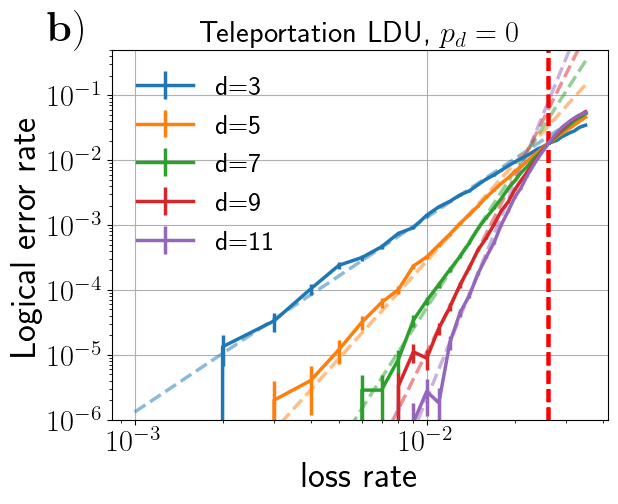

In [18]:
#Logical error rate at vanishing depolarizing noise

#first fit function
def power_law(x,a,b):
    return a*x**b

Ls = range(3,13,2)#distance list
depo=0#depolarizing noise probability

log_errors_all= []
loss_rate_all=[]
num_shots_all=[]

#load results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
    loss_rate=sorted(list(data_saved.keys()))
    for p in loss_rate:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    loss_rate_all.append(loss_rate)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    
        
#windows for the fit
windows_fit=[[1,15],[4,15],[6,15],[7,15],[11,15]]

#Plot results
plt.figure()
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_rate_all)):
    
    #logical error rate per round and its associated error bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

    #Fit (first with a free power law to help finding the right coefficient for the second fit with a fixed power law L)
    l0=int((Ls[0]-3)/2)
    w1=windows_fit[k+l0][0]
    w2=windows_fit[k+l0][1]

    fit0,cov_fit0=scipy.optimize.curve_fit(power_law,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)

    def power_law2(x,a):
        return a*x**L
    
    fit1,cov_fit1=scipy.optimize.curve_fit(power_law2,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True,p0=fit0[0])
    plt.plot(p,power_law2(np.array(p),*fit1),'--',alpha=0.5,color=palette[k])
    
    plt.axvline(x=0.026,linestyle='--',color='red')
    
    plt.errorbar(p, np.array(errors_per_round),linestyle='-',color=palette[k], yerr=std_err, label="d={}".format(L))

    
plt.xlabel("loss rate")
plt.ylabel("Logical error rate ")
plt.title(r'Teleportation LDU, $p_d=0$')
plt.text(0.0005,0.7,r'${\bf b)}$',fontsize=30)
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.ylim(10**(-6),0.5)
plt.legend();

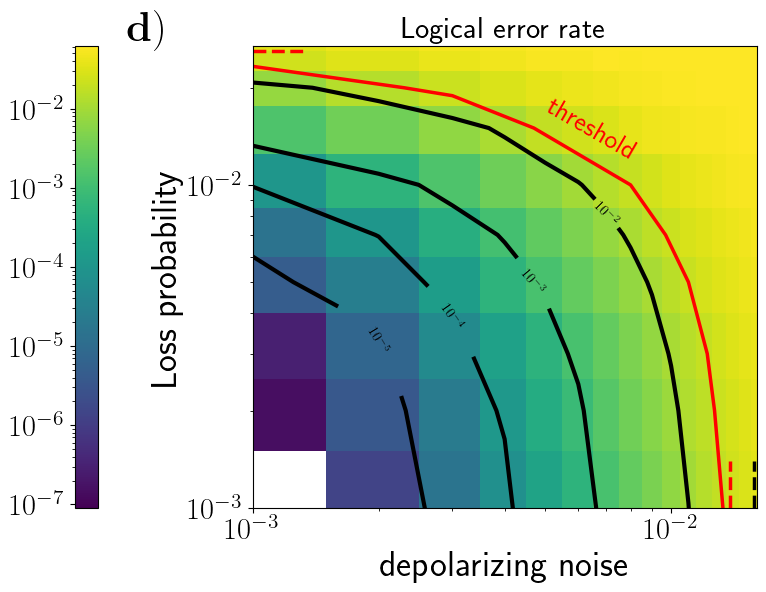

In [19]:
#Color map of the logical error rate for finite depolarizing noise and atom loss probabilities in Log-Log scale



#threshold line
threshold_depo=[0.0138,0.0133,0.0127,0.0122,0.011,0.0097,0.008,0.0047,0.003,0.0023,0.001,0]
threshold_loss=[0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0189,0.02,0.0233,0.026]

L = 11 #distance of the code

log_errors_all= []
depo_max=0.016 #maximal depolarizing noise plotted
loss_rate = [0.0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025,0.027] #list of loss probabilities
depo_all = []
num_shots_all=[]
loss_rate_all = []

#Load results
for loss in loss_rate:
    log_errors=[]
    
    depo2=[]
    depo2.append(0)
    if loss==0.0:
        log_errors.append(0)
    else:
        with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise=0.pkl'.format(L,L,L), 'rb') as fp:
            data_saved=pickle.load(fp)
        log_errors.append(data_saved[loss]['error_rate'])
    
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]

    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))


#color bar limits
min_error = 9.090913222209451e-08
max_error= max(list(itertools.chain.from_iterable(log_errors_all)))

#color bar scale
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min_error, vmax=max_error)

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
pcm = ax_main.pcolormesh(depo_all, loss_rate_all, log_errors_all, shading='auto', cmap=cmap, norm=norm)
cbar = fig.colorbar(pcm, ax=ax_main, location='left', pad=0.2)

# Define contour levels
contour_levels = [1e-5, 1e-4, 1e-3, 1e-2]
contour_levels_text = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
fmt = {level: txt for level, txt in zip(contour_levels, contour_levels_text)}
contours = ax_main.contour(depo_all, loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
ax_main.clabel(contours, inline=True, fontsize=10, fmt=fmt)

# Plot threshold
ax_main.plot(threshold_depo, threshold_loss, '-', color='red')
ax_main.text(0.005, 0.017, r'threshold', color='r', fontsize=20,rotation=-30, rotation_mode='anchor')

ax_main.axvline(x=0.0138,ymin=-0,ymax=0.1,linestyle='--',color='red')
ax_main.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
ax_main.axhline(y=0.026,xmin=-0,xmax=0.1,linestyle='--',color='red')

ax_main.set_xscale('log')
ax_main.set_yscale('log')

ax_main.set_ylim([1e-3, 2.7e-2])
ax_main.set_xlim([1e-3, 1.6e-2])
ax_main.set_xlabel('depolarizing noise')
ax_main.set_ylabel('Loss probability')
ax_main.set_title('Logical error rate')
ax_main.text(0.0005,0.028,r'${\bf d)}$',fontsize=30)

plt.show()


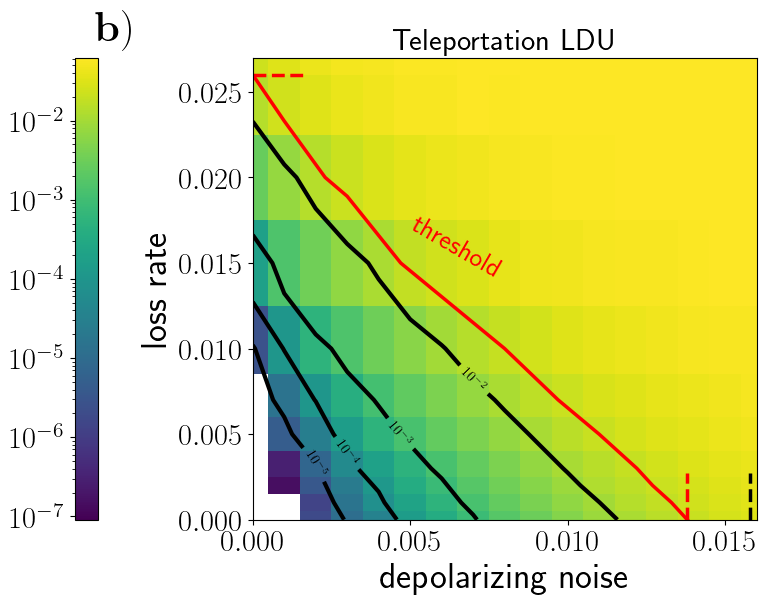

In [23]:
#Color map of the logical error rate for finite depolarizing noise and atom loss probabilities in linear scale



#threshold line
threshold_depo=[0.0138,0.0133,0.0127,0.0122,0.011,0.0097,0.008,0.0047,0.003,0.0023,0.001,0]
threshold_loss=[0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.0189,0.02,0.0233,0.026]

L = 11#code distance

log_errors_all= []
depo_max=0.016 #maximal depolarizing noise plotted
loss_rate = [0.0,0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025,0.027] #list of loss probabilities
depo_all = []
num_shots_all=[]
loss_rate_all = []

#load results
for loss in loss_rate:
    log_errors=[]
    
    depo2=[]
    depo2.append(0)
    if loss==0.0:
        log_errors.append(0)
    else:
        with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise=0.pkl'.format(L,L,L), 'rb') as fp:
            data_saved=pickle.load(fp)
        log_errors.append(data_saved[loss]['error_rate'])
    
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]

    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))

#color bar limits
min_error = 9.090913222209451e-08
max_error= max(list(itertools.chain.from_iterable(log_errors_all)))

#color bar scale
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min_error, vmax=max_error)

# Create the main plot
fig, ax_main = plt.subplots(figsize=(10, 6))
pcm = ax_main.pcolormesh(depo_all, loss_rate_all, log_errors_all, shading='auto', cmap=cmap, norm=norm)
cbar = fig.colorbar(pcm, ax=ax_main, location='left', pad=0.2)

# Define contour levels
contour_levels = [1e-5, 1e-4, 1e-3, 1e-2]
contour_levels_text = [r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$']
fmt = {level: txt for level, txt in zip(contour_levels, contour_levels_text)}
contours = ax_main.contour(depo_all, loss_rate_all, log_errors_all, levels=contour_levels, colors='k', linewidths=3)

# Add labels to the contours with proper formatting
ax_main.clabel(contours, inline=True, fontsize=10, fmt=fmt)

# Plot threshold
ax_main.plot(threshold_depo, threshold_loss, '-', color='red')
ax_main.text(0.005, 0.017, r'threshold', color='r', fontsize=20,rotation=-30, rotation_mode='anchor')

ax_main.axvline(x=0.0138,ymin=-0,ymax=0.1,linestyle='--',color='red')
ax_main.axvline(x=0.0158,ymin=-0,ymax=0.1,linestyle='--',color='black')
ax_main.axhline(y=0.026,xmin=-0,xmax=0.1,linestyle='--',color='red')


ax_main.set_ylim([0, 2.7e-2])
ax_main.set_xlim([0, 1.6e-2])
ax_main.set_xlabel('depolarizing noise')
ax_main.set_ylabel('loss rate')
ax_main.set_title('Teleportation LDU')
ax_main.text(-0.005,0.028,r'${\bf b)}$',fontsize=30)

plt.show()


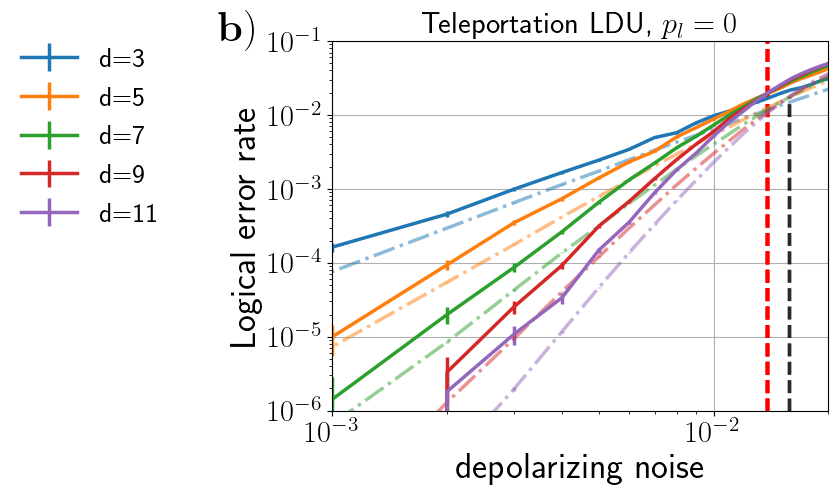

In [28]:
#Logical error rate at vanishing loss rate + comparison with surface code without LDU

#fit with free power law
def power_law(x,a,b):
    return a*x**b




Ls = range(3,13,2) # distance list
loss=0.00 # loss probability
log_errors_all= []
depo_all=[]
num_shots_all=[]

#load results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    for p in depo:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_all.append(depo)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)
    

#load results of standard surface code
log_errors_sf_all= []
depo_sf_all=[]
num_shots_sf_all=[]

for L in Ls:
    log_errors=[]
    num_shots_list=[]
    with open('data/logical_error/logical_error_standard_surface_code_d={}.pkl'.format(L), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo_list=sorted(list(data_saved.keys()))
    for p in depo_list:
        log_errors.append(data_saved[p]['error_rate'])
        num_shots_list.append(data_saved[p]['num_shots'])
    depo_sf_all.append(depo_list)
    log_errors_sf_all.append(log_errors)
    num_shots_sf_all.append(num_shots_list)
    
        
#fit windows
windows_fit=[[0,6],[0,6],[1,6],[1,6],[2,6]]

#plot results
plt.figure()
for k,(L, log_errors,num_shots_list,p,log_errors_sf,num_shots_sf_list,p_sf) in enumerate(zip(Ls, log_errors_all,num_shots_all,depo_all,log_errors_sf_all,num_shots_sf_all,depo_sf_all)):
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    l0=int((Ls[0]-3)/2)
    w1=windows_fit[k+l0][0]
    w2=windows_fit[k+l0][1]

    fit0,cov_fit0=scipy.optimize.curve_fit(power_law,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True)

    def power_law2(x,a):
        return a*x**((L+1)/2)

    fit1,cov_fit1=scipy.optimize.curve_fit(power_law2,p[w1:w2],errors_per_round[w1:w2],sigma=std_err[w1:w2],absolute_sigma=True,p0=fit0[0])
    #plt.plot(p,power_law2(np.array(p),*fit1),'--',alpha=0.8,color=palette[k])
    
    
    
    
    plt.axvline(x=0.0138,linestyle='--',color='red')
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err,label='d={}'.format(L))

    
    errors_per_round_sf=[1-(1-error)**(1/L) for error in log_errors_sf]
    successes_per_round_sf=[(1-error)**(1/L) for error in log_errors_sf]
    successes_sf=[(1-error) for error in log_errors_sf]
    std_err_sf = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors_sf,num_shots_sf_list,successes_per_round_sf,successes_sf)]
    
    plt.errorbar(p_sf, np.array(errors_per_round_sf),linestyle='-.',color=palette[k],alpha=0.5, yerr=std_err_sf)

    plt.axvline(x=0.0158,ymin=-0,ymax=0.85,linestyle='--',alpha=0.3,color='black')
    
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate")
plt.title(r'Teleportation LDU, $p_l=0$')
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.xlim(1e-3,2e-2)
plt.ylim(10**(-6),0.1)
plt.text(0.0005,0.1,r'${\bf b)}$',fontsize=30)
plt.legend(bbox_to_anchor=(-0.3, 1.05))

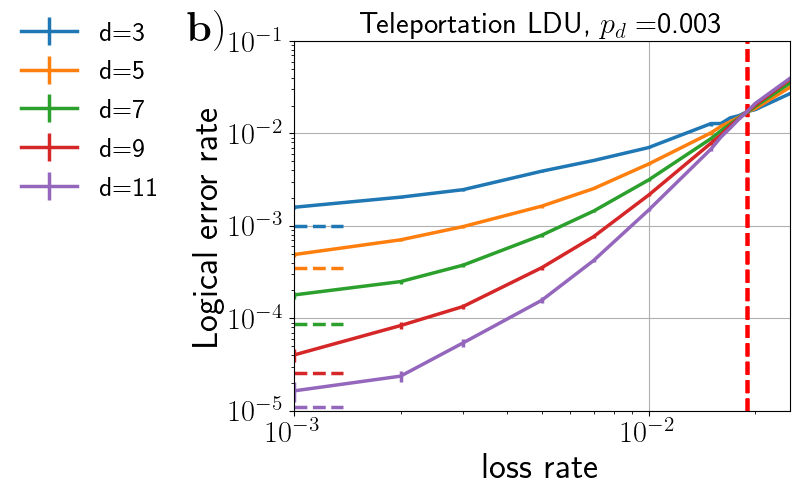

In [29]:
#Logical error rate at finite depolarizing noise

#fit with free power law
def power_law(x,a,b):
    return a*x**b


Ls = range(3,13,2) # distance list
depo=0.003 # depolarizing noise probability
log_errors_all= []
loss_all=[]
num_shots_all=[]
loss_list1=[0.0,0.001,0.002,0.003,0.005,0.007,0.01,0.015]
loss_list2=[0.016,0.017,0.018,0.019]
loss_list3=[0.02,0.025]
loss_list=loss_list1+loss_list2+loss_list3 #loss probabilities
#load results
for L in Ls:
    log_errors=[]
    num_shots_list=[]
    for loss in loss_list1:
        with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
            data_saved=pickle.load(fp)
        log_errors.append(data_saved[depo]['error_rate'])
        num_shots_list.append(data_saved[depo]['num_shots'])
    
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_depo_noise={}.pkl'.format(L,L,L,depo), 'rb') as fp:
        data_saved=pickle.load(fp)
        
    for loss in loss_list2:
        log_errors.append(data_saved[loss]['error_rate'])
        num_shots_list.append(data_saved[loss]['num_shots'])
    
    for loss in loss_list3:
        with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
            data_saved=pickle.load(fp)
        log_errors.append(data_saved[depo]['error_rate'])
        num_shots_list.append(data_saved[depo]['num_shots'])
    
        
        
    loss_all.append(loss_list)
    log_errors_all.append(log_errors)
    num_shots_all.append(num_shots_list)

#plot results
for k,(L, log_errors,num_shots_list,p) in enumerate(zip(Ls, log_errors_all,num_shots_all,loss_all)):

    #logical error rate per round and its associated error bar
    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
    successes_per_round=[(1-error)**(1/L) for error in log_errors]
    successes=[(1-error) for error in log_errors]
    std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
               for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]
    
    l0=int((Ls[0]-3)/2)
    plt.axvline(x=0.0189,linestyle='--',color='red')
    plt.axhline(y=errors_per_round[0],xmin=0,xmax=0.1,linestyle='--',color=palette[k])
    
    plt.errorbar(p, np.array(errors_per_round),color=palette[k], yerr=std_err,label='d={}'.format(L))

   
    
plt.xlabel("loss rate")
plt.ylabel("Logical error rate")
plt.title(r'Teleportation LDU, $p_d=$'+str(depo))
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.xlim(1e-3,2.5e-2)
plt.ylim(10**(-5),0.1)
plt.text(0.0005,0.1,r'${\bf b)}$',fontsize=30)
plt.legend(bbox_to_anchor=(-0.6, 0.5))


[29.51137754 13.7591709  25.92664337]


/tmp/ipykernel_6874/1654289647.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', len(loss_list))


Text(0.0005, 0.015, '${\\bf b)}$')

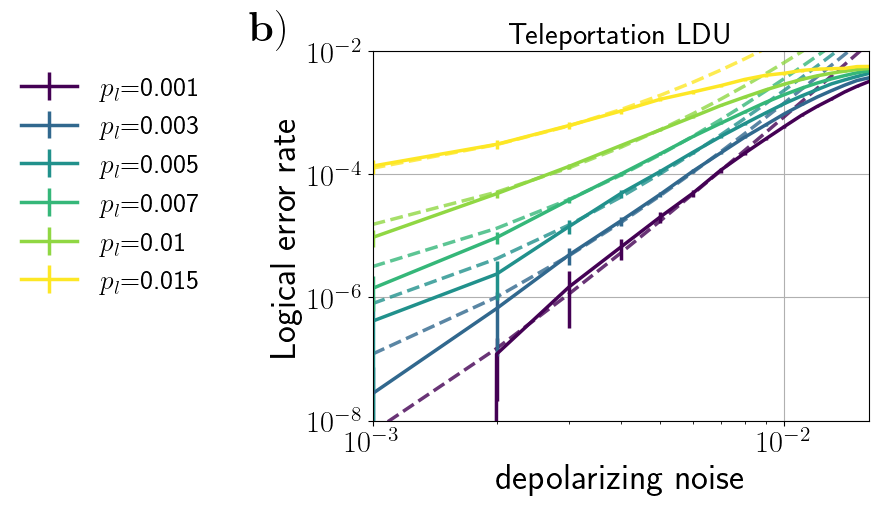

In [46]:
import matplotlib.cm as cm

log_errors_all= []
depo_max=0.016 #maximal depolarizing noise plotted
loss_rate = [0.001,0.002,0.003,0.005,0.007,0.01,0.015,0.02,0.025,0.027] #list of loss probabilities
depo_all = []
num_shots_all=[]
loss_rate_all = []
L=11

#load results
for loss in loss_rate:
    log_errors=[]
    with open('data/logical_error/logical_error_teleportation_LDU_d=({},{})_rounds={}_loss_rate={}.pkl'.format(L,L,L,loss), 'rb') as fp:
        data_saved=pickle.load(fp)
    depo=sorted(list(data_saved.keys()))
    depo2=[]
    num_shots_list=[]
    
    for p in depo:
        if p<=depo_max:
            depo2.append(p)
            log_errors.append(data_saved[p]['error_rate'])
            num_shots_list.append(data_saved[p]['num_shots'])

    errors_per_round=[1-(1-error)**(1/L) for error in log_errors]

    depo_all.append(depo2)
    log_errors_all.append(errors_per_round)
    loss_rate_all.append([loss]*len(depo2))
    num_shots_all.append(num_shots_list)

#select points where the logical error rate per round is below 3e-4
depo_loss2=[]
log_errors2=[]
std_err2=[]

for depos,losses,errors,num_shots in zip(depo_all,loss_rate_all,log_errors_all,num_shots_all):
    
    errors_per_round=[1-(1-error)**(1/L) for error in errors]
    successes_per_round=[(1-error)**(1/L) for error in errors]
    successes=[(1-error) for error in errors]
    std_errs_per_round = [(error*(1-error)/num_shot)**0.5/L*success_per_round/success 
        for error,num_shot,success_per_round,success in zip(errors,num_shots,successes_per_round,successes)]
    
    for depo,loss,error,std_err in zip(depos,losses,errors_per_round,std_errs_per_round):
        if error<3e-4 and error>0:
            depo_loss2.append([depo,loss])
            log_errors2.append(error)
            std_err2.append(std_err)

#fitting function for the entire 2D plot
def global_fit(xy,a,b,c):
    if type(xy[0])==float:
        x,y=xy
        return (a*x+b*y)**6+ (c*y)**11-(b*y)**6
    else:
        return [(a*x+b*y)**6+ (c*y)**11-(b*y)**6 for x,y in xy]

#fit with the above function
fit,cov_fit=scipy.optimize.curve_fit(global_fit,depo_loss2,log_errors2,sigma=std_err2,absolute_sigma=True,p0=np.random.randint(20, size=3))
print(fit)


L=11
loss_rate=np.array(loss_rate_all)[:,0]
loss_list=[0.0,0.001,0.003,0.005,0.007,0.01,0.015]

#generate a colormap
colormap = cm.get_cmap('viridis', len(loss_list))
for k,(log_errors,num_shots_list,p,loss) in enumerate(zip(log_errors_all,num_shots_all,depo_all,loss_rate)):
    if loss in loss_list:
        errors_per_round=[1-(1-error)**(1/L) for error in log_errors]
        successes_per_round=[(1-error)**(1/L) for error in log_errors]
        successes=[(1-error) for error in log_errors]
        std_err = [(error*(1-error)/num_shots)**0.5/L*success_per_round/success 
                   for error,num_shots,success_per_round,success in zip(log_errors,num_shots_list,successes_per_round,successes)]

        plt.errorbar(p, np.array(errors_per_round),color=colormap(k), yerr=std_err, label="$p_l$={}".format(loss))
        
        global_fit_table=[global_fit([float(depo),float(loss)],*fit) for depo in p]
        plt.plot(p,global_fit_table,'--',alpha=0.8,color=colormap(k))
        
plt.xlabel("depolarizing noise")
plt.ylabel("Logical error rate")
plt.title('Teleportation LDU')
plt.grid()
plt.yscale("log")
plt.xscale('log')
plt.xlim(1e-3,1.6e-2)
plt.ylim(10**(-8),10**(-2))
plt.legend(bbox_to_anchor=(-0.3, 1))
plt.text(0.0005,0.015,r'${\bf b)}$',fontsize=30)
